In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

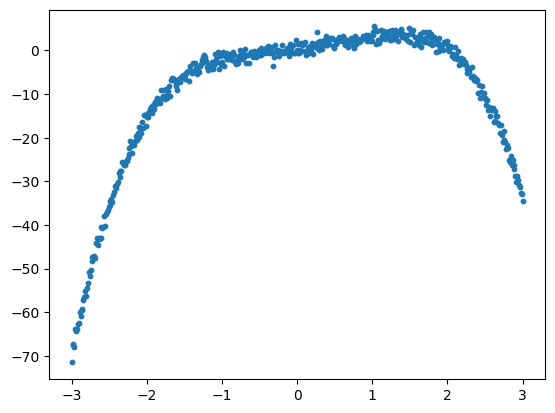

In [9]:
#generate polynomial data
def generate_synthetic_polynomial_data(n=500, degree=3, noise=1.0):
    np.random.seed(0)
    x = np.linspace(-3, 3, n)
    y = sum(np.random.uniform(-5, 5) * x**i for i in range(degree + 1))
    y += np.random.normal(0, noise, n)
    plt.scatter(x, y, s=10)
    plt.show()
    return x, y

x, y = generate_synthetic_polynomial_data(degree=4)

data = {'x':x, 'y':y}
df = pd.DataFrame(data)

In [10]:
df.head()

,x,y
0,-3.000000,-71.519638
1,-2.987976,-67.624503
2,-2.975952,-67.258513
3,-2.963928,-67.973305
4,-2.951904,-63.877517


### Train-validation split

In [11]:
x = x.reshape(-1, 1)
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)

### Compute MSE for all degrees

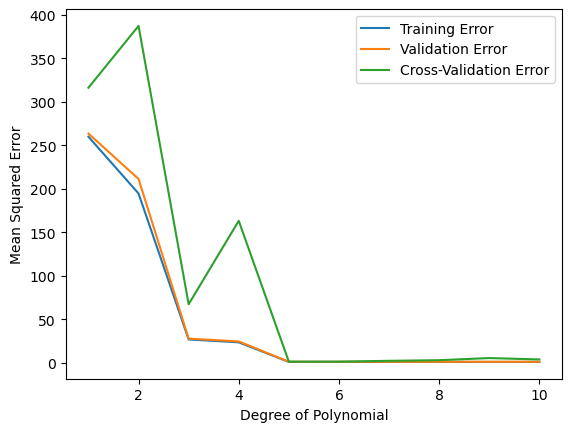

In [17]:
maxdeg = 10
training_error, validation_error = [], []
cross_validation_error = []

for d in range(maxdeg):
    #to capture non-linear relationships in the data, (regression line should be non linear)
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(x)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.fit_transform(x_val)
    
    lreg = LinearRegression()
    lreg.fit(x_train_poly, y_train)
    
    y_train_pred = lreg.predict(x_train_poly)
    y_val_pred = lreg.predict(x_val_poly)
    
    training_error.append(mean_squared_error(y_train, y_train_pred))
    validation_error.append(mean_squared_error(y_val, y_val_pred))
    
    mse_scores = cross_val_score(lreg, x_poly, y, cv=10, scoring='neg_mean_squared_error')
    cross_validation_error.append(-mse_scores.mean())

plt.plot(range(1, maxdeg + 1), training_error, label='Training Error')
plt.plot(range(1, maxdeg + 1), validation_error, label='Validation Error')
plt.plot(range(1, maxdeg + 1), cross_validation_error, label='Cross-Validation Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Finding the best degree

In [18]:
# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is", best_degree)
print("The best degree of the model using cross-validation is", best_cross_val_degree)

The best degree of the model using validation is 4
The best degree of the model using cross-validation is 4


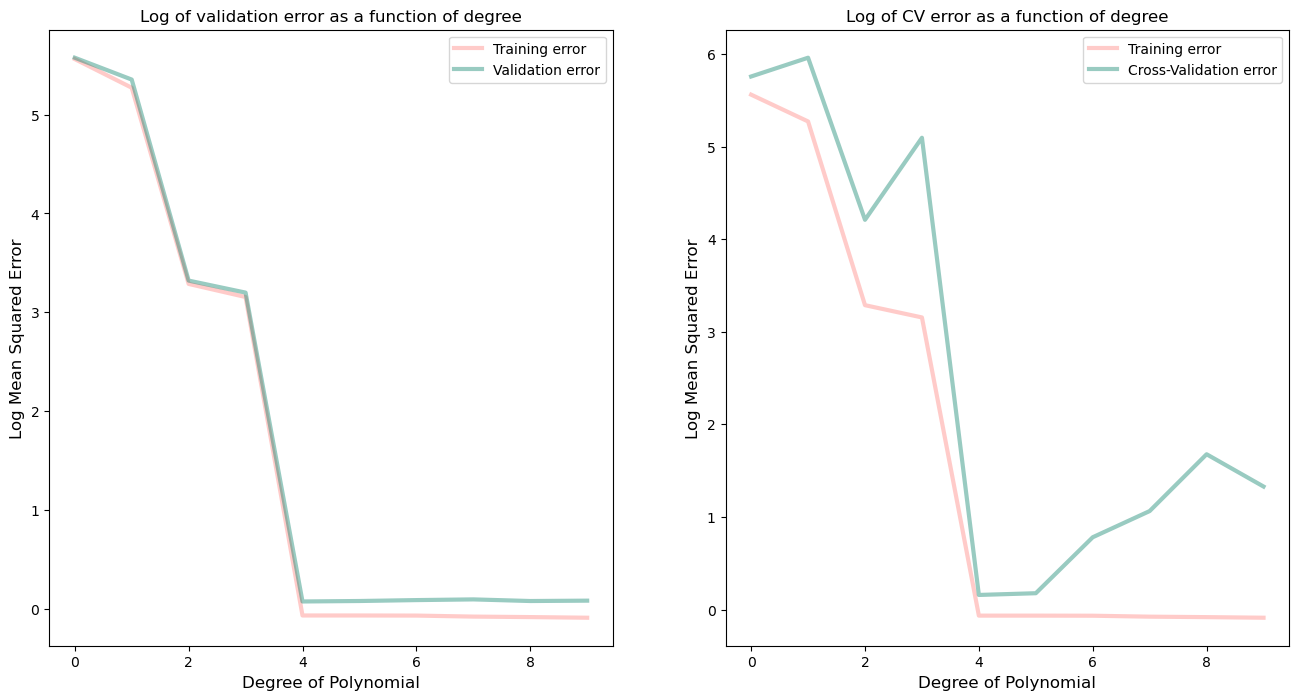

In [19]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();